In [1]:
# Data wrangling
import pandas as pd
# from sklearn_pandas import DataFrameMapper

import numpy as np
# Data visualisation
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Statistical Libraries
from scipy.stats import skew, kurtosis, chi2_contingency, entropy, norm
import scipy.stats as stats
import pylab

# missing values
import missingno as msno

# Machine learning
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder, StandardScaler, PowerTransformer, RobustScaler
from sklearn.compose import make_column_transformer, ColumnTransformer

from sklearn.pipeline import make_pipeline,Pipeline
# from imblearn.pipeline import Pipeline #as imb_Pipeline
#make_pipeline 


from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel,SelectKBest, chi2, f_classif
from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_validate
#resample
from imblearn.over_sampling import SMOTE,SMOTENC

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import math
# from collections import Counter
from scipy.stats import entropy

In [2]:
df= pd.read_csv("data/CDC_BRFSS_Survey_2020.csv")

In [3]:
df.shape

(401958, 280)

In [105]:
# save a copy of data
raw_data = df.copy()

In [106]:
desired_columns = ['X_MENT14D',
                   'CELLSEX',
                   'X_AGEG5YR',
                   'ACEDEPRS',
                   'ACEDRINK',
                   'ACEDRUGS',
                   'ACEPRISN',
                   'ACEPUNCH',
                   'ACEHURT1',
                   'ACESWEAR',
                   'ACETOUCH',
                   'ACETTHEM',
                   'ACEHVSEX',
                   'ACEDIVRC',
                   'SLEPTIM1',
                   'PHYSHLTH',
                   'GENHLTH',
                   'EXERANY2',
                   'INCOME2',
                   'EMPLOY1',
                   'X_SMOKER3',
                   'MARIJAN1',
                   'RSNMRJN1',
                   'X_RFBING5',
                   'X_RFDRHV7',
                   'HLTHPLN1',
                   'PERSDOC2',
                   'MEDCOST'
                  ]

In [107]:
raw_data = raw_data[desired_columns]
raw_data.head()

,X_MENT14D,CELLSEX,X_AGEG5YR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEPUNCH,ACEHURT1,ACESWEAR,...,INCOME2,EMPLOY1,X_SMOKER3,MARIJAN1,RSNMRJN1,X_RFBING5,X_RFDRHV7,HLTHPLN1,PERSDOC2,MEDCOST
0,3,NaN,8,1.0,1.0,1.0,2.0,1.0,1.0,3.0,...,1.0,4.0,1,NaN,NaN,1,1,2.0,3.0,1.0
1,1,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,7.0,9,NaN,NaN,9,9,1.0,1.0,1.0
2,1,NaN,10,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,7.0,7.0,4,NaN,NaN,1,1,1.0,1.0,2.0
3,1,NaN,13,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,99.0,5.0,4,NaN,NaN,1,1,1.0,3.0,2.0
4,1,NaN,13,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,77.0,7.0,4,NaN,NaN,1,1,1.0,1.0,2.0


In [108]:
raw_data.shape

(401958, 28)

### Mental health status


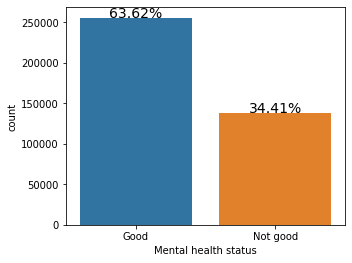

In [109]:
# transform to categorical data
dic = {1:"Good", 2:"Not good", 3:"Not good", 9: np.nan}
raw_data['X_MENT14D'] = raw_data['X_MENT14D'].replace(dic).astype('category')

plt.figure(figsize=(5,4))

s = sns.countplot(x = 'X_MENT14D' ,data = raw_data)
plt.xlabel('Mental health status')
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(raw_data)*100),
            ha="center", fontsize=14) 
# plt.savefig('binary.png')

<AxesSubplot:ylabel='X_MENT14D'>

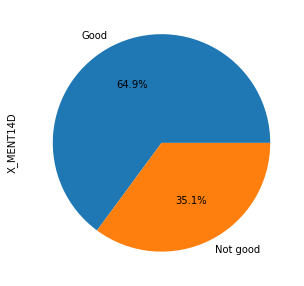

In [110]:
plt.figure(figsize=(5,5))
raw_data['X_MENT14D'].value_counts().plot.pie(autopct="%1.1f%%")

We have an imbalanced classification problem. We will solve this issue later in the model by using the hyper parameter "scale_pos_weight"

### Sex

In [111]:
dic_sex = {1: "Male" , 
           2: "Female"}
raw_data['CELLSEX'] = raw_data['CELLSEX'].replace(dic_sex).astype('category')

### Age

In [112]:
dic_age = {1: '18-24',
           2: '25-29',
           3: '30-34',
           4: '35-39',
           5: '40-44', 
           6: '45-49',
           7: '50-54',
           8: '55-59',
           9: '60-64',
           10:'65-69',
           11:'70-74',
           12:'75-79',
           13:'80 or older',
           14: np.nan }
raw_data['X_AGEG5YR'] = raw_data['X_AGEG5YR'].replace(dic_age).astype('category')

### Adverse chilhood experience

In [113]:
dic1 = {1: 'Yes',
        2: 'No',
        7: 'Not sure',
        9: np.nan}
for colname in ['ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN']:
    raw_data[colname] = raw_data[colname].replace(dic1).astype('category')

dic2 = {1: 'Never',
        2: 'Once',
        3: 'More than once',
        7: 'Not sure',
        9:  np.nan}
for colname in ['ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX']:
    raw_data[colname] = raw_data[colname].replace(dic2).astype('category')
    
dic3 = {1: 'Yes',
        2: 'No',
        8: 'Not married',
        7: 'Not sure',
        9:  np.nan}
raw_data['ACEDIVRC'] = raw_data['ACEDIVRC'].replace(dic3).astype('category')

### Sleep time


In [114]:
# replace don't know and refused with missing
raw_data['SLEPTIM1'] = raw_data['SLEPTIM1'].replace(77, np.nan)
raw_data['SLEPTIM1'] = raw_data['SLEPTIM1'].replace(99, np.nan)

### Physical and general health

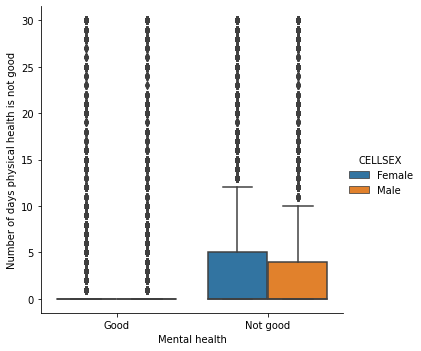

In [115]:
# GENHLTH
dic_GENHLTH = {1: "Excellent",
              2: "Very Good",
              3: "Good",
              4: "Fair",
              5: "Poor",
              7: "Unsure",
              9:  np.nan}
raw_data["GENHLTH"] = raw_data["GENHLTH"].replace(dic_GENHLTH).astype("category")



# physical health
# replace don't know and refused with missing, replace none with 0 
raw_data["PHYSHLTH"] = raw_data["PHYSHLTH"].replace(77, np.nan)
raw_data["PHYSHLTH"] = raw_data["PHYSHLTH"].replace(88, 0)
raw_data["PHYSHLTH"] = raw_data["PHYSHLTH"].replace(99, np.nan)

sns.catplot(y="PHYSHLTH", hue='CELLSEX', x= 'X_MENT14D', data=raw_data, kind="box")
plt.ylabel('Number of days physical health is not good')
plt.xlabel('Mental health')


# EXERANY2
dic_EXERANY2 = {1: "Yes",
                2: "No",
                7: "Unsure",
                9:  np.nan}

raw_data["EXERANY2"] = raw_data["EXERANY2"].replace(dic_EXERANY2).astype("category")


### Employment status and income level

In [116]:
#EMPLOY1
dic_EMPLOY1 =  {1: "Employed for wages",
                2: "Self-employed",
                3: "Out of work (> 1 year)",
                4: "Out of work (< 1 year)",
                5: "Homemaker",
                6: "Student",
                7: "Retired",
                8: "Unable to work",
                9:  np.nan}


raw_data["EMPLOY1"] = raw_data["EMPLOY1"].replace(dic_EMPLOY1).astype('category')

income_dic = {1: 'Less than 10k',
              2: '10k-15k',
              3: '15k-20k',
              4: '20k-25k',
              5: '25k-35k',
              6: '35k-50k',
              7: '50k-75k',
              8: '75kormore',
              77: 'Not sure',
              99:  np.nan}

raw_data['INCOME2']= raw_data['INCOME2'].replace(income_dic).astype('category')

### Smoke and marijuana

In [117]:
dic_smoke = {1:"Every day ",
             2:"Some days" ,
             3:"Former" ,
             4:'Never',
             7:"Not Sure" ,
             9: np.nan}
raw_data['X_SMOKER3'] = raw_data['X_SMOKER3'].replace(dic_smoke).astype('category')


# marijuana usuage days
raw_data['MARIJAN1'] = raw_data['MARIJAN1'].replace(77, np.nan)
raw_data['MARIJAN1'] = raw_data['MARIJAN1'].replace(99, np.nan)
raw_data['MARIJAN1'] = raw_data['MARIJAN1'].replace(88, 0)

# reason for using marijuana
dic_mar = { 1:'medical reasons', 
            2:'non-medical reasons',
            3:'medical/non-medical reasons',
            7:'Not Sure',
            9: np.nan}
raw_data['RSNMRJN1']= raw_data['RSNMRJN1'].replace(dic_mar).astype('category')

### Drink

In [118]:
# being drinker
dic_drink = {1: 'Yes',
             2: 'No',
             9: np.nan}

raw_data['X_RFBING5']=raw_data['X_RFBING5'].replace(dic_drink).astype('category')


# heavy drinkers
raw_data['X_RFDRHV7'] = raw_data['X_RFDRHV7'].replace(dic_drink).astype('category')

### Healthcare

In [119]:
# healthcare coverage
dic_healthcare =  {1: "Yes",
                   2: "No",
                   7: "Don’t know/Not Sure ",
                   9:  np.nan}


raw_data["HLTHPLN1"] = raw_data["HLTHPLN1"].replace(dic_healthcare).astype('category')

# personal doctor/healthcare provider
dic2_healthcare =  {1: "Yes",
                   2: "No",
                   3: 'More than one',
                   7: "Don’t know/Not Sure ",
                   9:  np.nan}
raw_data["PERSDOC2"] = raw_data["PERSDOC2"].replace(dic2_healthcare).astype('category')

# healthcare cost concern
raw_data['MEDCOST']=raw_data['MEDCOST'].replace(dic_healthcare).astype('category')

In [120]:
# Number of each type of column
raw_data.dtypes

X_MENT14D    category
CELLSEX      category
X_AGEG5YR    category
ACEDEPRS     category
ACEDRINK     category
ACEDRUGS     category
ACEPRISN     category
ACEPUNCH     category
ACEHURT1     category
ACESWEAR     category
ACETOUCH     category
ACETTHEM     category
ACEHVSEX     category
ACEDIVRC     category
SLEPTIM1      float64
PHYSHLTH      float64
GENHLTH      category
EXERANY2     category
INCOME2      category
EMPLOY1      category
X_SMOKER3    category
MARIJAN1      float64
RSNMRJN1     category
X_RFBING5    category
X_RFDRHV7    category
HLTHPLN1     category
PERSDOC2     category
MEDCOST      category
dtype: object

## Rename features

In [121]:
# rename the features
dic_rename={'X_MENT14D': 'MentalHealthStatus',
            'CELLSEX'  : 'Sex',
            'X_AGEG5YR': 'Age',
            'X_BMI5CAT': 'BMIcategory',
            'ACEDEPRS' : 'LivingWithDepressed', 
            'ACEDRINK' : 'LivingWithAlcoholic',
            'ACEDRUGS' : 'LivingWithAddict',
            'ACEPRISN' : 'LivingWithCriminals',
            'ACEDIVRC' : 'ParentsMartialStatus',
            'ACEPUNCH' : 'ParentsFight',
            'ACEHURT1' : 'PhysicallyHurt',
            'ACESWEAR' : 'VerballyAbused',
            'ACETOUCH' : "SexuallyAbused",
            'ACETTHEM' : 'ForcedSexuallyTouch',
            'ACEHVSEX' : 'ForcedHavingSex',
            'SLEPTIM1' : 'SleepPerDay',
            'PHYSHLTH' : 'BadPhysicallHealthPerMonth',
            'GENHLTH'  : 'GeneralHelath',
            'EXERANY2' : 'ExcercisePerMonth',
            'INCOME2'  : 'IncomeLevel',
            'EMPLOY1'  : 'EmploymentStatus',
            'X_SMOKER3' : 'Smoke',
            'MARIJAN1' : 'MarijuanaPerMonth',
            'RSNMRJN1' : 'MarijuanaReason',
            'X_RFBING5': 'Drinking',
            'X_RFDRHV7': 'HeavyDrinking',
            'HLTHPLN1' : 'HealthcareCoverage',
            'PERSDOC2' : 'HealthcareProvider',
            'MEDCOST'  : 'HealthcareCostConcern'
            }
raw_data = raw_data.rename(columns=dic_rename)


In [122]:
raw_data.head()

,MentalHealthStatus,Sex,Age,LivingWithDepressed,LivingWithAlcoholic,LivingWithAddict,LivingWithCriminals,ParentsFight,PhysicallyHurt,VerballyAbused,...,IncomeLevel,EmploymentStatus,Smoke,MarijuanaPerMonth,MarijuanaReason,Drinking,HeavyDrinking,HealthcareCoverage,HealthcareProvider,HealthcareCostConcern
0,Not good,NaN,55-59,Yes,Yes,Yes,No,Never,Never,More than once,...,Less than 10k,Out of work (< 1 year),Every day,NaN,NaN,Yes,Yes,No,More than one,Yes
1,Good,NaN,65-69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Retired,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes
2,Good,NaN,65-69,No,No,No,No,Never,Never,Never,...,50k-75k,Retired,Never,NaN,NaN,Yes,Yes,Yes,Yes,No
3,Good,NaN,80 or older,No,No,No,No,Never,Never,Never,...,NaN,Homemaker,Never,NaN,NaN,Yes,Yes,Yes,More than one,No
4,Good,NaN,80 or older,No,No,No,No,Never,Never,Never,...,Not sure,Retired,Never,NaN,NaN,Yes,Yes,Yes,Yes,No


# Data cleaning

### Missing values

In [123]:
# Function to calculate missing values by column# Funct 
"""
   input: data frame
   output: a table with missing values 
   """
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [124]:
ACE_missing_values = missing_values_table(raw_data)
ACE_missing_values

Your selected dataframe has 28 columns.
There are 28 columns that have missing values.


,Missing Values,% of Total Values
MarijuanaReason,390573,97.2
ForcedHavingSex,275997,68.7
SexuallyAbused,275917,68.6
ForcedSexuallyTouch,275879,68.6
VerballyAbused,275430,68.5
PhysicallyHurt,275376,68.5
ParentsFight,275103,68.4
ParentsMartialStatus,274462,68.3
LivingWithCriminals,274284,68.2
LivingWithAlcoholic,274246,68.2


Text(0.5, 1.0, 'Percent missing data by feature')

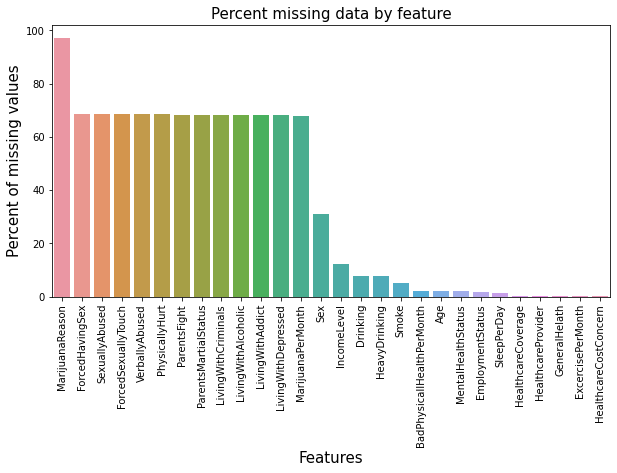

In [125]:
f, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation='90')
sns.barplot(x=ACE_missing_values.index, y=ACE_missing_values['% of Total Values'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<AxesSubplot:>

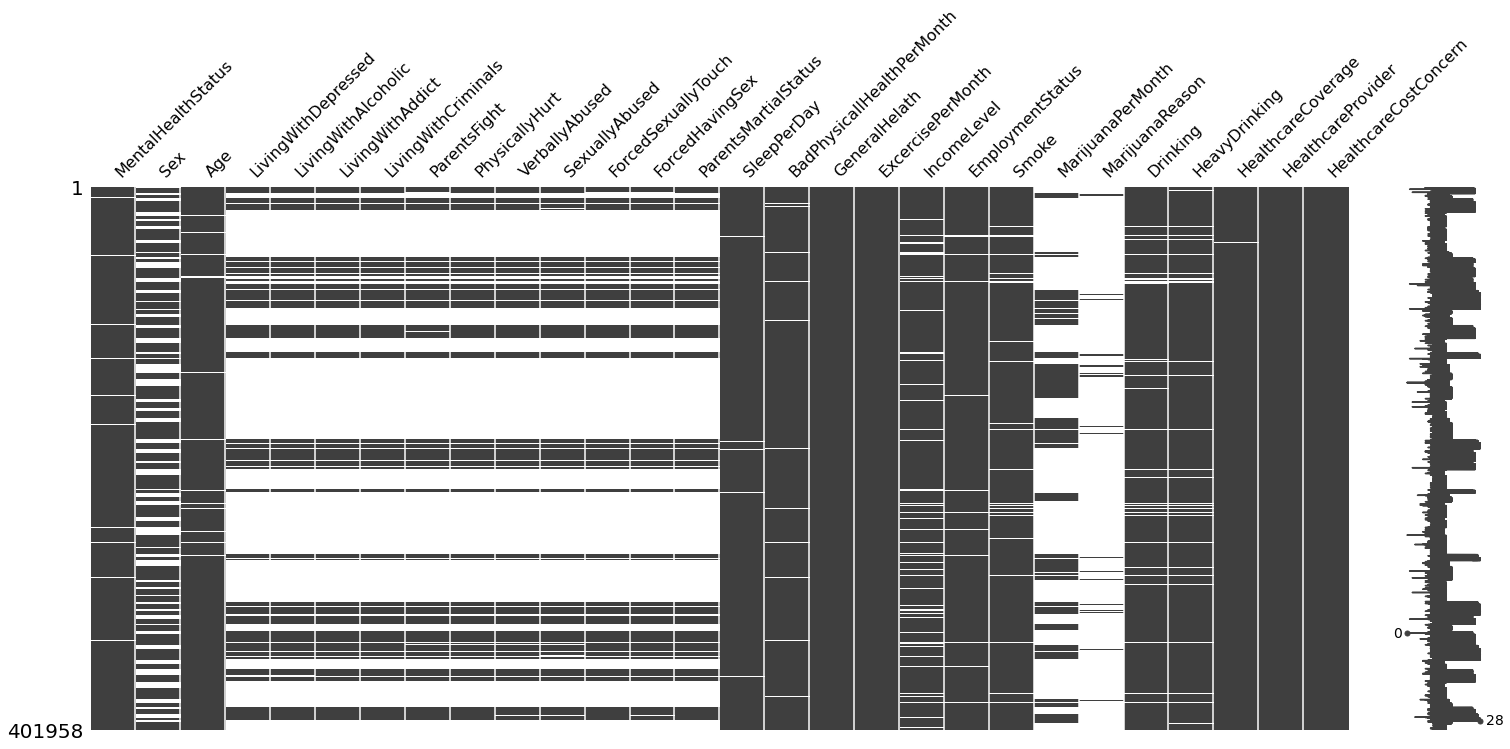

In [126]:
msno.matrix(raw_data)

In [127]:
# msno.matrix(raw_data.sort_values('SexuallyAbused'))

we can safely say the missing data in columns 'Living WithDepressed' to 'ParentsMartialStatus' are not missing at random (MNAR).

<AxesSubplot:>

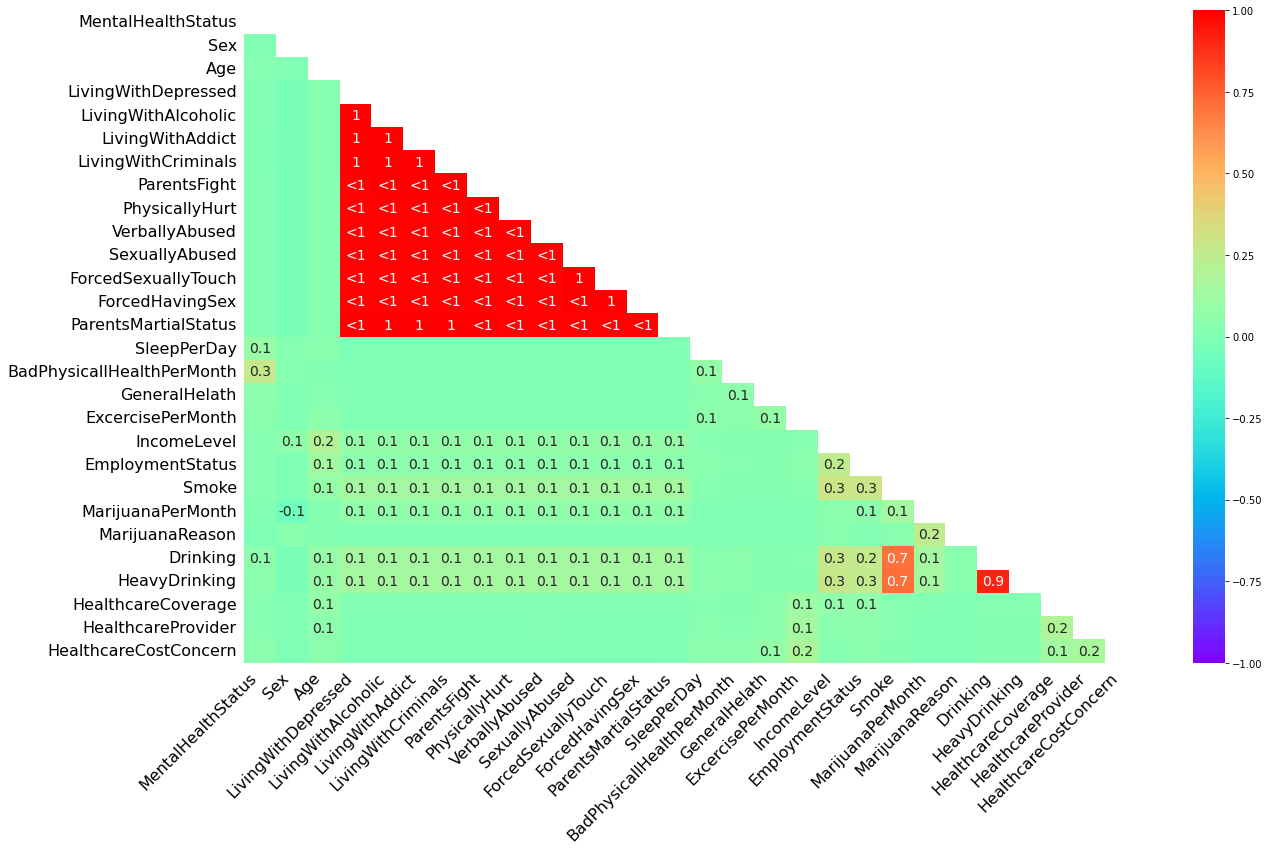

In [128]:
msno.heatmap(raw_data,cmap='rainbow')

<AxesSubplot:>

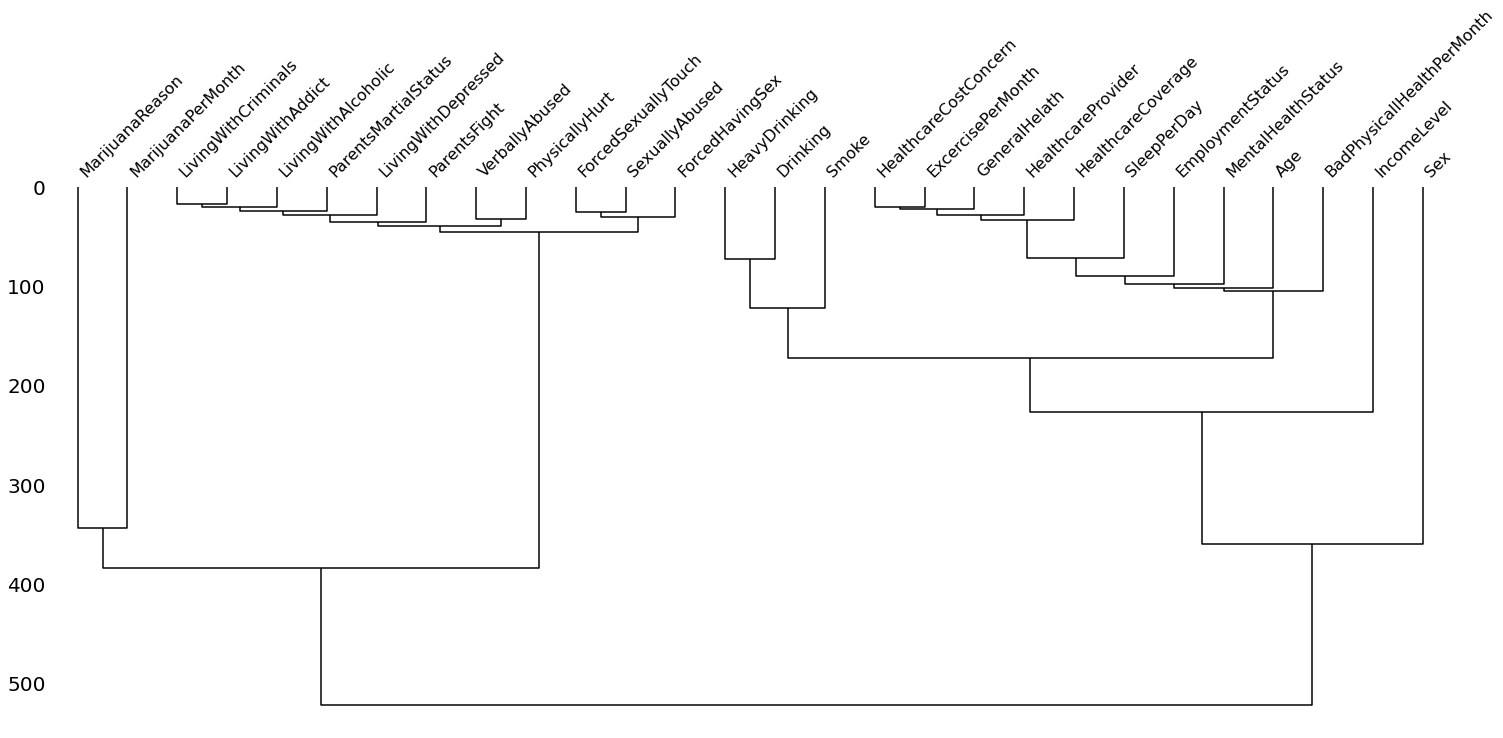

In [129]:
msno.dendrogram(raw_data)

### Data preprocessing

Drop the MarijuanaReason because it has a lot of (97.2%) missing values

In [130]:
raw_data = raw_data.drop('MarijuanaReason',axis = 1)

In [131]:
raw_data.columns

Index(['MentalHealthStatus', 'Sex', 'Age', 'LivingWithDepressed',
       'LivingWithAlcoholic', 'LivingWithAddict', 'LivingWithCriminals',
       'ParentsFight', 'PhysicallyHurt', 'VerballyAbused', 'SexuallyAbused',
       'ForcedSexuallyTouch', 'ForcedHavingSex', 'ParentsMartialStatus',
       'SleepPerDay', 'BadPhysicallHealthPerMonth', 'GeneralHelath',
       'ExcercisePerMonth', 'IncomeLevel', 'EmploymentStatus', 'Smoke',
       'MarijuanaPerMonth', 'Drinking', 'HeavyDrinking', 'HealthcareCoverage',
       'HealthcareProvider', 'HealthcareCostConcern'],
      dtype='object')

In [132]:
# Select categorical columns
categorical_cols = [cname for cname in raw_data.columns if str(raw_data[cname].dtype) == "category"]
categorical_cols.remove('MentalHealthStatus')

# Select numerical columns
numerical_cols = [cname for cname in raw_data.columns if raw_data[cname].dtype in ['int64', 'float64']]

In [133]:
categorical_cols

['Sex',
 'Age',
 'LivingWithDepressed',
 'LivingWithAlcoholic',
 'LivingWithAddict',
 'LivingWithCriminals',
 'ParentsFight',
 'PhysicallyHurt',
 'VerballyAbused',
 'SexuallyAbused',
 'ForcedSexuallyTouch',
 'ForcedHavingSex',
 'ParentsMartialStatus',
 'GeneralHelath',
 'ExcercisePerMonth',
 'IncomeLevel',
 'EmploymentStatus',
 'Smoke',
 'Drinking',
 'HeavyDrinking',
 'HealthcareCoverage',
 'HealthcareProvider',
 'HealthcareCostConcern']

##### Numerical variables

In [134]:
numerical_cols

['SleepPerDay', 'BadPhysicallHealthPerMonth', 'MarijuanaPerMonth']

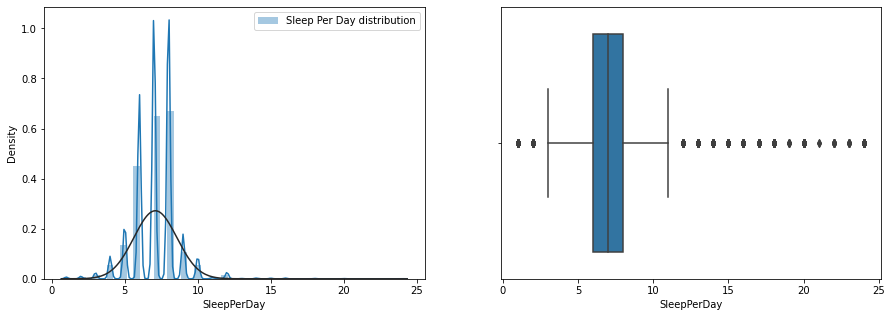

In [135]:
from scipy.stats import norm

plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(raw_data['SleepPerDay'], fit= norm,label = ['Sleep Per Day distribution'])
plt.legend()

plt.subplot(122)
sns.boxplot(raw_data['SleepPerDay'])
plt.show()


There are some outliers that does not make sense! How can a person sleep 24 hours per day?!


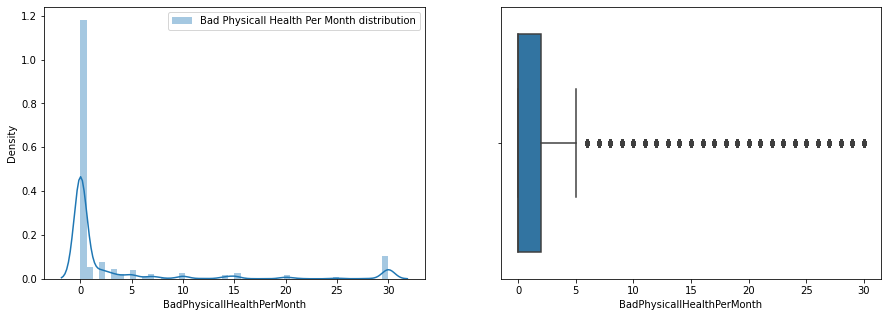

In [136]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(raw_data['BadPhysicallHealthPerMonth'],label = ['Bad Physicall Health Per Month distribution'])
plt.legend()

plt.subplot(122)
sns.boxplot(raw_data['BadPhysicallHealthPerMonth'])
plt.show()

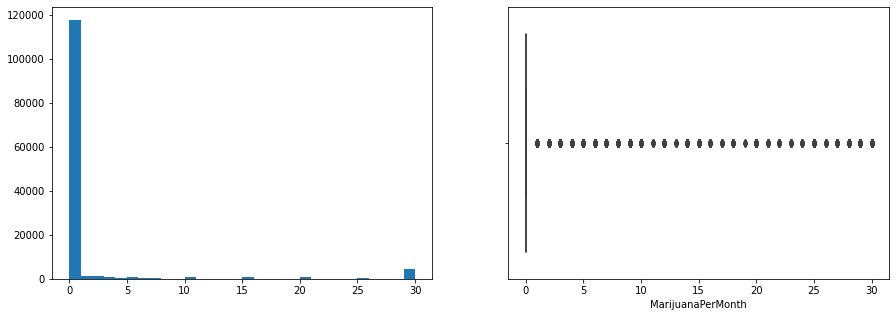

In [137]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(raw_data['MarijuanaPerMonth'],bins=30)

plt.subplot(122)
sns.boxplot(raw_data['MarijuanaPerMonth'])
plt.show()

### Skewness and kurtosis

In [138]:
rows_skew = raw_data[numerical_cols].apply(lambda x: skew(x.dropna()))
rows_kurtosis = raw_data[numerical_cols].apply(lambda x: kurtosis(x.dropna()))

data_skewness = pd.DataFrame({'Skewness':rows_skew,'kurtosis': rows_kurtosis})
data_skewness.sort_values(by = ['Skewness'],ascending=False)

,Skewness,kurtosis
MarijuanaPerMonth,4.286638,17.100761
BadPhysicallHealthPerMonth,2.551695,5.217650
SleepPerDay,0.755139,8.574742


BadPhysicallHealthPerMonth and MarijuanaPerMonth have skew > 1 with means they are skewed features! In addition, kurtosis >3 means we have outliers in those features (also you can find them in the box plots)

### Count number of outliers

In [139]:
def count_outliers(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    Outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).sum()
    return Outliers, X.notnull().sum()

Outliers, l = count_outliers(raw_data[numerical_cols])
Outliers_table =  pd.DataFrame({'number of outliers':Outliers, '% of outliers':Outliers/l*100})
Outliers_table.sort_values(by = 'number of outliers' ,ascending=False )

,number of outliers,% of outliers
BadPhysicallHealthPerMonth,59281,15.073983
MarijuanaPerMonth,11459,8.867616
SleepPerDay,6090,1.532986


Hopefully, percentage of outliers are not more than 30%

### Drop or cap SleepPerDay outliers


12.0


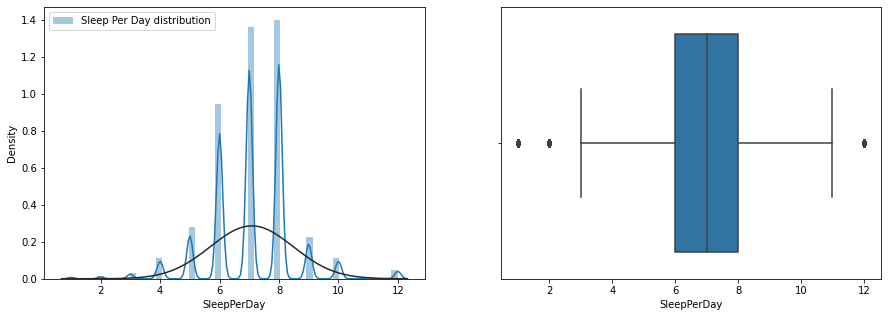

In [142]:
# Cap the outliers
q_h = raw_data['SleepPerDay'].quantile(0.99)
print(q_h)

raw_data['SleepPerDay'] = raw_data['SleepPerDay'].clip(upper = q_h)

plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(raw_data['SleepPerDay'], fit= norm,label = ['Sleep Per Day distribution'])
plt.legend()

plt.subplot(122)
sns.boxplot(raw_data['SleepPerDay'])
plt.show()


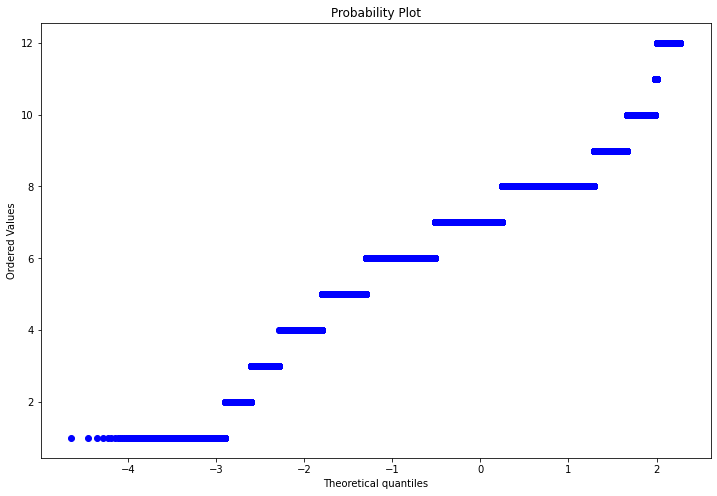

In [143]:
stats.probplot(raw_data['SleepPerDay'],plot=pylab);

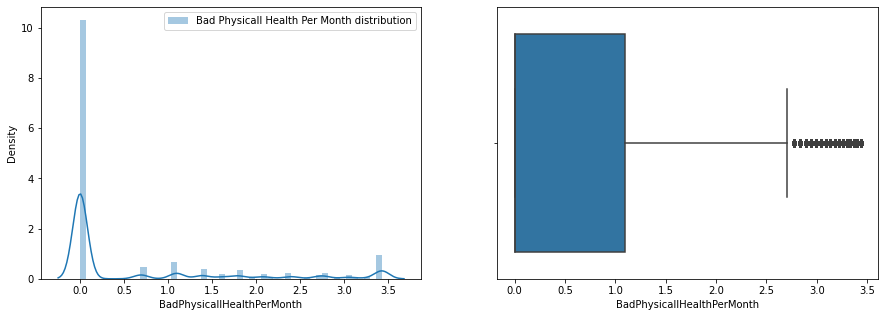

In [144]:
# CHECK THE IMPACT OF LOG TRANSFORMATION ON BadPhysicallHealthPerMonth
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(np.log1p(raw_data['BadPhysicallHealthPerMonth']),
             label = ['Bad Physicall Health Per Month distribution'])
plt.legend()

plt.subplot(122)
sns.boxplot(np.log1p(raw_data['BadPhysicallHealthPerMonth']))
plt.show()

In [145]:
# Drop MarijuanaPerMonth
raw_data = raw_data.drop('MarijuanaPerMonth',axis=1)

### Remove rows of data corresponding to the missing values of the target

In [146]:
# remove rows corresponding to the missing values of the target
raw_data.drop(raw_data.loc[raw_data['MentalHealthStatus'].isnull()].index, inplace=True)
raw_data['MentalHealthStatus'].unique()

['Not good', 'Good']
Categories (2, object): ['Good', 'Not good']

In [147]:
raw_data.shape

(394029, 26)

# Split the data

In [148]:
X = raw_data.drop('MentalHealthStatus',axis=1)
y = raw_data['MentalHealthStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Data preprocessing

In [150]:
# encode target 
y_dic = {'Good':1, 'Not good':0}
y_train = y_train.replace(y_dic).astype('int')
y_test = y_test.replace(y_dic).astype('int')



# imputing the numerical features
Imputer_num = SimpleImputer(strategy='mean')
Imputer_num1 = SimpleImputer(strategy='median')

transformer1 = Pipeline(steps=[('imp1', Imputer_num), 
                               ('num1', StandardScaler())])

transformer2 = Pipeline(steps=[
                               ('imp2',  Imputer_num1),
                               ('num2',  PowerTransformer())
                                ])
                       

transformer3= Pipeline(steps= [

                               ('cat',OneHotEncoder(sparse=False, handle_unknown = 'ignore'))])

transformer4= Pipeline(steps= [
                               ('imp4', SimpleImputer(strategy='constant', fill_value= 'Missing')), 
                               ('cat2',OneHotEncoder(sparse=False, handle_unknown = 'ignore'))])


to_normal = ['SleepPerDay']
to_log =  ['BadPhysicallHealthPerMonth'] 
impute_missing =  ['LivingWithDepressed', 
                   'LivingWithAlcoholic',
                   'LivingWithAddict',
                   'LivingWithCriminals',
                   'ParentsMartialStatus',
                   'ParentsFight',
                   'PhysicallyHurt',
                   'VerballyAbused',
                   'SexuallyAbused',
                   'ForcedSexuallyTouch',
                   'ForcedHavingSex']

no_impute = ['Sex',
              'Age',
              'ParentsMartialStatus',
              'GeneralHelath',
              'ExcercisePerMonth',
              'IncomeLevel',
              'EmploymentStatus',
              'Smoke',
              'Drinking',
              'HeavyDrinking',
              'HealthcareCoverage',
              'HealthcareProvider',
              'HealthcareCostConcern']
preprocessor = ColumnTransformer(transformers=[
                                              ('numerical'       ,transformer1, to_normal),
                                              ('numerical2'      ,transformer2, to_log),
                                              ('categorical'     ,transformer3, no_impute),
                                              ('categorical_ACE' ,transformer4, impute_missing)
                                              ], remainder='passthrough')

### Set scale_pos_weight for imbalanced binary classification

In [151]:
from collections import Counter
# the negative class refers to the majority class  
# and the positive class refers to the minority class 
counter = Counter(y_train)
# estimate scale_pos_weight value
negative = counter[0]
positive = counter[1]
weight_estimate =  negative/positive
weight_estimate

0.5401900666943542

# Create pipeline

In [152]:
classifier = XGBClassifier(n_estimators = 1811, 
                           min_child_weight = 5,
                           max_depth = 3,
                           learning_rate = 0.1,
                           reg_alpha = 0,
                           objective='binary:logistic',
                           verbosity= 1,
                           enable_categorical=True,
                           use_label_encoder=False,
                           scale_pos_weight= 0.75,
                           eval_metric = 'auc',
                           tree_method='gpu_hist',
                           gpu_id=0,)


my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', classifier)],
                              verbose = True)

model = my_pipeline.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   5.1s


In [153]:
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imp1',
                                                                   SimpleImputer()),
                                                                  ('num1',
                                                                   StandardScaler())]),
                                                  ['SleepPerDay']),
                                                 ('numerical2',
                                                  Pipeline(steps=[('imp2',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num2',
                                                                   PowerTransformer())]),
                                                  ['BadPhysicallHealthPerMonth']),
                                                 ('categorical',
                                                  Pipeline(steps...
                               gamma=0, gpu_id=0, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=5,
                               missing=nan, monotone_constraints='()',
                               n_estimators=1811, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))],
         verbose=True)

# Prediction

In [154]:
y_predict = my_pipeline.predict(X_test)

In [155]:
print("Accuracy: ", accuracy_score(y_test, y_predict))
print("Precision: ", precision_score(y_test, y_predict))
print("Recall: ", recall_score(y_test, y_predict))
print("f1: ", f1_score(y_test, y_predict))

Accuracy:  0.7188792731517905
Precision:  0.765602589091979
Recall:  0.8157007954233768
f1:  0.7898580968280469


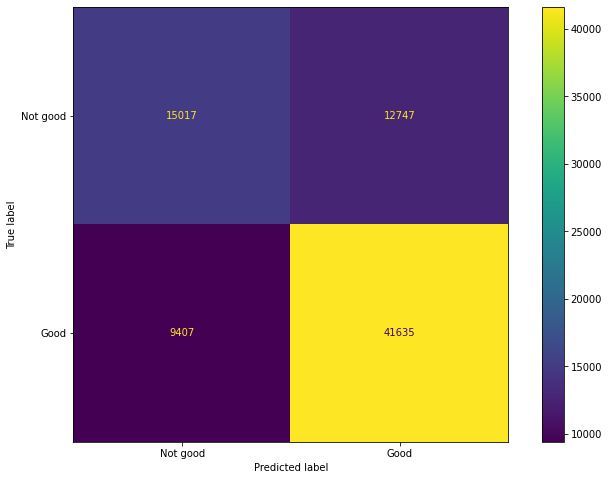

In [156]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_predict)
cmp = ConfusionMatrixDisplay(cm, display_labels=['Not good', 'Good']) #
cmp.plot(ax=ax)

plt.show();

### Classification report

In [60]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.61      0.54      0.58     27764
           1       0.77      0.82      0.79     51042

    accuracy                           0.72     78806
   macro avg       0.69      0.68      0.68     78806
weighted avg       0.71      0.72      0.71     78806



Random model: ROC AUC=0.500
XGboost: ROC AUC=0.753


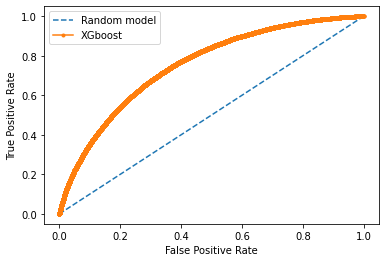

In [61]:
# generate a no skill prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# predict probabilities
lr_probs = my_pipeline.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random model: ROC AUC=%.3f' % (ns_auc))
print('XGboost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGboost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [62]:
my_pipeline.named_steps["model"].get_booster().get_fscore()

{'f0': 893.0,
 'f1': 1033.0,
 'f2': 200.0,
 'f3': 196.0,
 'f4': 173.0,
 'f5': 163.0,
 'f6': 144.0,
 'f7': 127.0,
 'f8': 106.0,
 'f9': 79.0,
 'f10': 63.0,
 'f11': 49.0,
 'f12': 59.0,
 'f13': 91.0,
 'f14': 123.0,
 'f15': 138.0,
 'f16': 134.0,
 'f17': 177.0,
 'f18': 96.0,
 'f19': 67.0,
 'f20': 90.0,
 'f21': 108.0,
 'f22': 32.0,
 'f23': 52.0,
 'f24': 37.0,
 'f25': 96.0,
 'f26': 9.0,
 'f27': 35.0,
 'f28': 46.0,
 'f29': 97.0,
 'f30': 8.0,
 'f31': 21.0,
 'f32': 35.0,
 'f33': 89.0,
 'f34': 8.0,
 'f35': 61.0,
 'f36': 33.0,
 'f37': 81.0,
 'f38': 52.0,
 'f39': 7.0,
 'f40': 80.0,
 'f41': 37.0,
 'f42': 65.0,
 'f43': 68.0,
 'f44': 25.0,
 'f45': 121.0,
 'f46': 91.0,
 'f47': 58.0,
 'f48': 67.0,
 'f49': 16.0,
 'f50': 80.0,
 'f51': 45.0,
 'f52': 62.0,
 'f53': 87.0,
 'f54': 13.0,
 'f55': 56.0,
 'f56': 22.0,
 'f57': 51.0,
 'f58': 96.0,
 'f59': 3.0,
 'f60': 68.0,
 'f61': 31.0,
 'f62': 29.0,
 'f63': 44.0,
 'f64': 14.0,
 'f65': 64.0,
 'f66': 64.0,
 'f67': 54.0,
 'f68': 88.0,
 'f69': 31.0,
 'f70': 130.0,
 'f7

In [63]:
from eli5 import show_weights,show_prediction
show_weights(my_pipeline.named_steps["model"])
# 

Weight,Feature
0.0787,f95
0.0693,f2
0.0648,f122
0.0617,f21
0.0563,f1
0.0524,f5
0.0477,f46
0.0457,f105
0.0444,f70
0.0273,f6


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

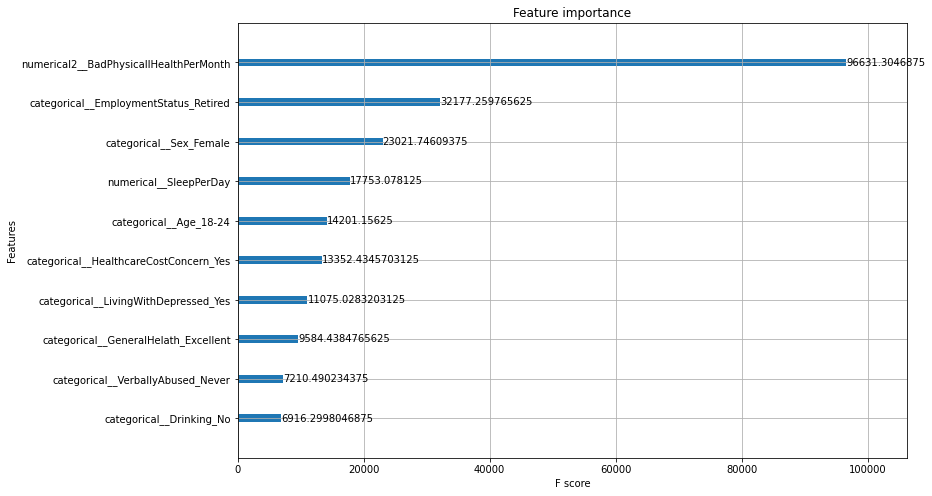

In [64]:
plt.rcParams["figure.figsize"] = (12, 8)

feat_names = my_pipeline.named_steps['preprocessor'].get_feature_names_out()
my_pipeline.named_steps['model'].get_booster().feature_names = list(feat_names)
xgboost.plot_importance(
                        my_pipeline.named_steps['model'].get_booster(),
                        max_num_features=10,
                        importance_type='total_gain')

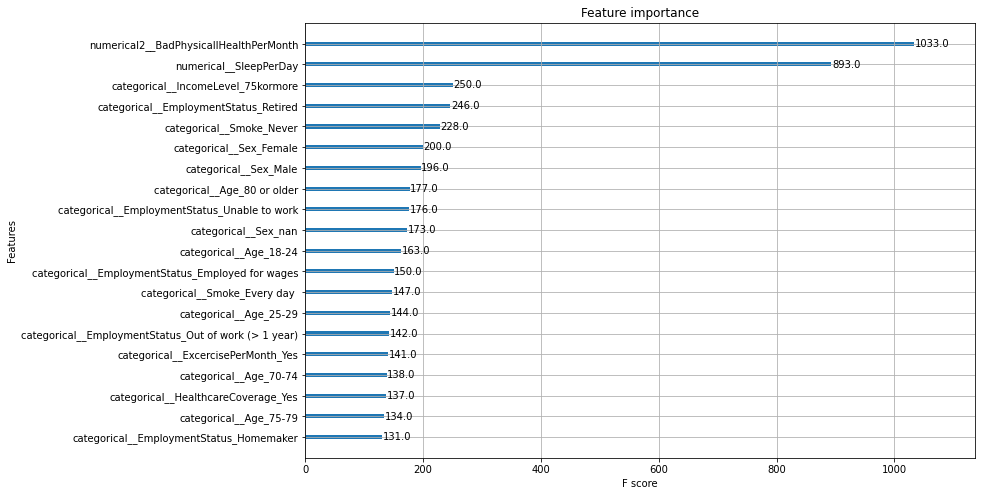

In [65]:
from xgboost import plot_importance,to_graphviz,plot_tree
plot_importance(my_pipeline.named_steps["model"], max_num_features=20) 
plt.show()

## Cross validate

In [66]:
# scores = cross_validate(
#     my_pipeline, X_train, y_train,
#     cv=5, 
#     scoring=('precision', 'recall', 'f1'),
#     verbose= 2,
#     n_jobs= -1
# )
# scores

# Fine tuning

In [68]:
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 3000, num = 10)]
params_xgb = {'model__n_estimators'    : n_estimators,
              'model__tree_method'     : ['gpu_hist'],
              'model__max_depth'       : list(range(3,10)),
              'model__min_child_weight': [2,3,4,5],
              'model__learning_rate'   : [0.1,0.15,0.2,0.25,0.3],
              'model__reg_alpha'       : [0,1],
              'model__reg_lambda'      : [0,1],
              'model__scale_pos_weight': [0.53,0.55,0.65,0.7,0.75]
             }

rf_search = RandomizedSearchCV(
                                estimator=my_pipeline,
                                param_distributions=params_xgb,
                                scoring= 'f1',
                                cv=5,
                                n_iter = 20,
                                random_state=42,
                                verbose = 2
                                )


rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.6s
[CV] END model__learning_rate=0.3, model__max_depth=4, model__min_child_weight=4, model__n_estimators=900, model__reg_alpha=1, model__reg_lambda=0, model__scale_pos_weight=0.75, model__tree_method=gpu_hist; total time=   6.4s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.5s
[CV] END model__learning_rate=0.3, model__max_depth=4, model__min_child_weight=4, model__n_estimators=900, model__reg_alpha=1, model__reg_lambda=0, model__scale_pos_weight=0.75, model__tree_method=gpu_hist; total time=   6.2s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   3.6s
[CV] END model__learning_rate=0.3, model__max_depth=4, model

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numerical',
                                                                               Pipeline(steps=[('imp1',
                                                                                                SimpleImputer()),
                                                                                               ('num1',
                                                                                                StandardScaler())]),
                                                                               ['SleepPerDay']),
                                                                              ('numerical2',
                                                                               Pipeline(steps=[('imp2',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('num2',
                                                                                                PowerTransformer())]),
                                                                               ['BadPhysicallHealthPerMont...
                   param_distributions={'model__learning_rate': [0.1, 0.15, 0.2,
                                                                 0.25, 0.3],
                                        'model__max_depth': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'model__min_child_weight': [2, 3, 4, 5],
                                        'model__n_estimators': [300, 600, 900,
                                                                1200, 1500,
                                                                1800, 2100,
                                                                2400, 2700,
                                                                3000],
                                        'model__reg_alpha': [0, 1],
                                        'model__reg_lambda': [0, 1],
                                        'model__scale_pos_weight': [0.53, 0.55,
                                                                    0.65, 0.7,
                                                                    0.75],
                                        'model__tree_method': ['gpu_hist']},
                   random_state=42, scoring='f1', verbose=2)

In [69]:
rf_search.best_params_

{'model__tree_method': 'gpu_hist',
 'model__scale_pos_weight': 0.75,
 'model__reg_lambda': 1,
 'model__reg_alpha': 0,
 'model__n_estimators': 2700,
 'model__min_child_weight': 5,
 'model__max_depth': 3,
 'model__learning_rate': 0.1}

In [70]:
rf_search.best_score_

0.7894929790533489

# Predict

In [71]:
# Call predict on the estimator with the best found parameters.
y_predict = rf_search.predict(X_test)
print("Test f1_score : ", f1_score(y_test, y_predict))

Test f1_score :  0.7900937132450583


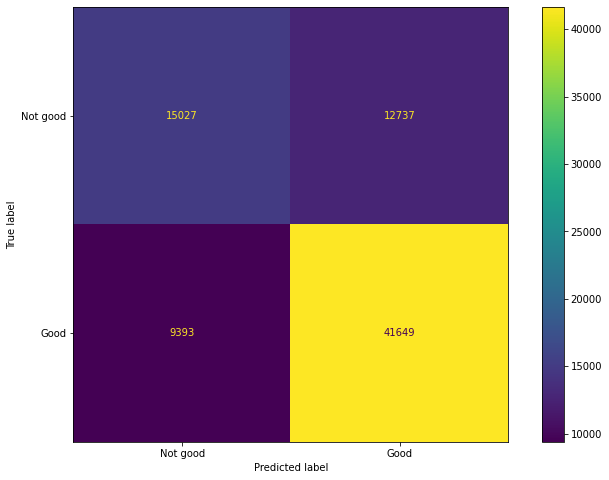

In [72]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_predict)
cmp = ConfusionMatrixDisplay(cm, display_labels=['Not good', 'Good']) #
cmp.plot(ax=ax)

plt.savefig('RS_ConfusionMatrix_binary.png')

In [73]:
print("Accuracy: ", accuracy_score(y_test, y_predict))
print("Precision: ", precision_score(y_test, y_predict))
print("Recall: ", recall_score(y_test, y_predict))
print("f1: ", f1_score(y_test, y_predict))

Accuracy:  0.7191838184909779
Precision:  0.7658036994814842
Recall:  0.8159750793464206
f1:  0.7900937132450583


Random model: ROC AUC=0.500
XGboost: ROC AUC=0.752


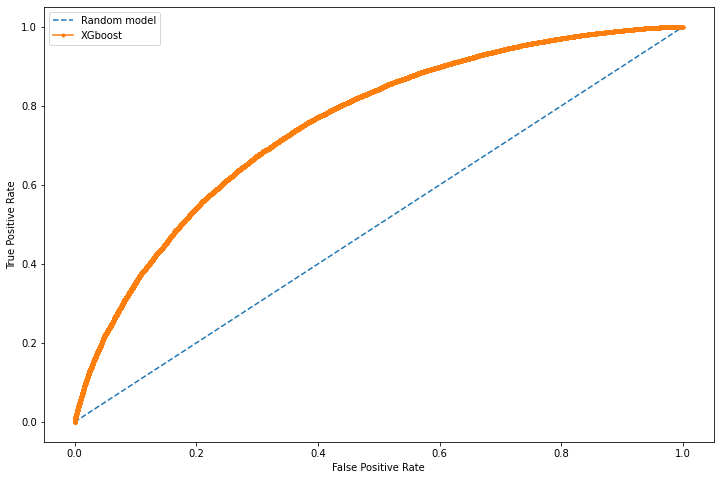

In [74]:
# generate a no skill prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# predict probabilities
lr_probs = rf_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random model: ROC AUC=%.3f' % (ns_auc))
print('XGboost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGboost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
# plt.savefig('RS_ROC_binary.png')